<a href="https://colab.research.google.com/github/Oscar8gonzalez8/MachineLearning/blob/main/bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 41.5 MB/s 


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
np.set_printoptions(precision=3, suppress=True)
import math
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
import keras_tuner as kt
import plotnine as pn
from plotnine import ggplot, geom_point, aes, geom_smooth

Mounted at /content/gdrive


# View the Data

In [ ]:
dat = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
dat['total'] = dat['casual']+dat['registered']
dat['dteday'] = pd.to_datetime(dat['dteday'])


In [ ]:
dat.head()

,dteday,holiday,workingday,hum,windspeed,temp_c,feels_like_c,Clear,Light Snow,Mist,...,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,Since
0,2012-12-01,0,0,0.81,0,4.22,3.9980,1,0,0,...,0,0,0,0,0,0,0,0,0,700.0
1,2012-12-01,0,0,0.81,0,4.22,3.9980,1,0,0,...,0,0,0,0,0,0,0,0,0,700.0
2,2012-12-01,0,0,0.81,0,4.22,3.9980,0,0,1,...,0,0,0,0,0,0,0,0,0,700.0
3,2012-12-01,0,0,0.81,9,4.22,1.9982,0,0,1,...,0,0,0,0,0,0,0,0,0,700.0
4,2012-12-01,0,0,0.81,6,4.22,3.0014,1,0,0,...,0,0,0,0,0,0,0,0,0,700.0


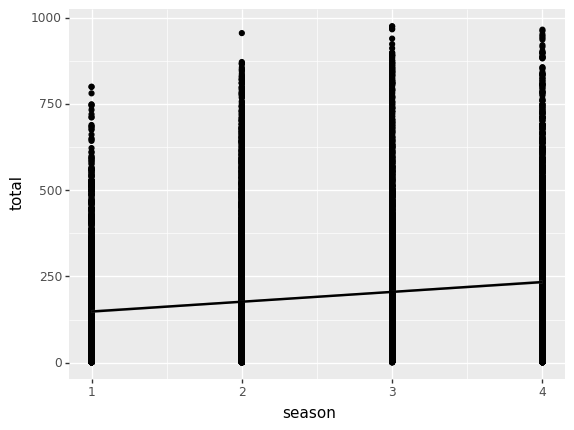

<ggplot: (8732223154653)>

In [ ]:
(ggplot(dat, aes(x='season', y='total'))+
 geom_point()+
 geom_smooth())

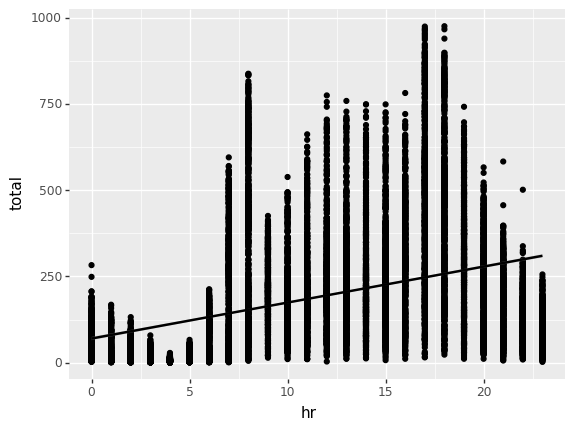

<ggplot: (8732223160497)>

In [ ]:
(ggplot(dat, aes(x='hr', y='total'))+
 geom_point()+
 geom_smooth())

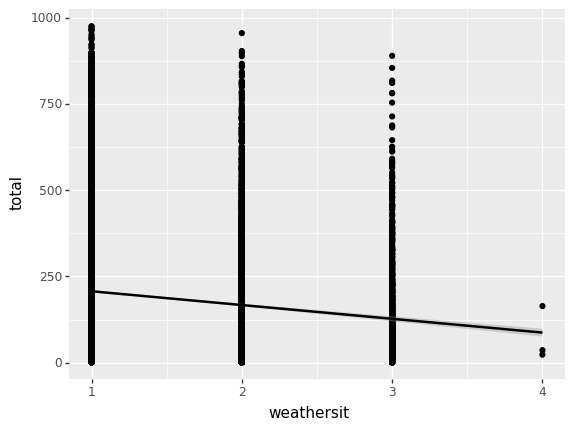

<ggplot: (8732220102865)>

In [ ]:
(ggplot(dat, aes(x='weathersit', y='total'))+
 geom_point()+
 geom_smooth())

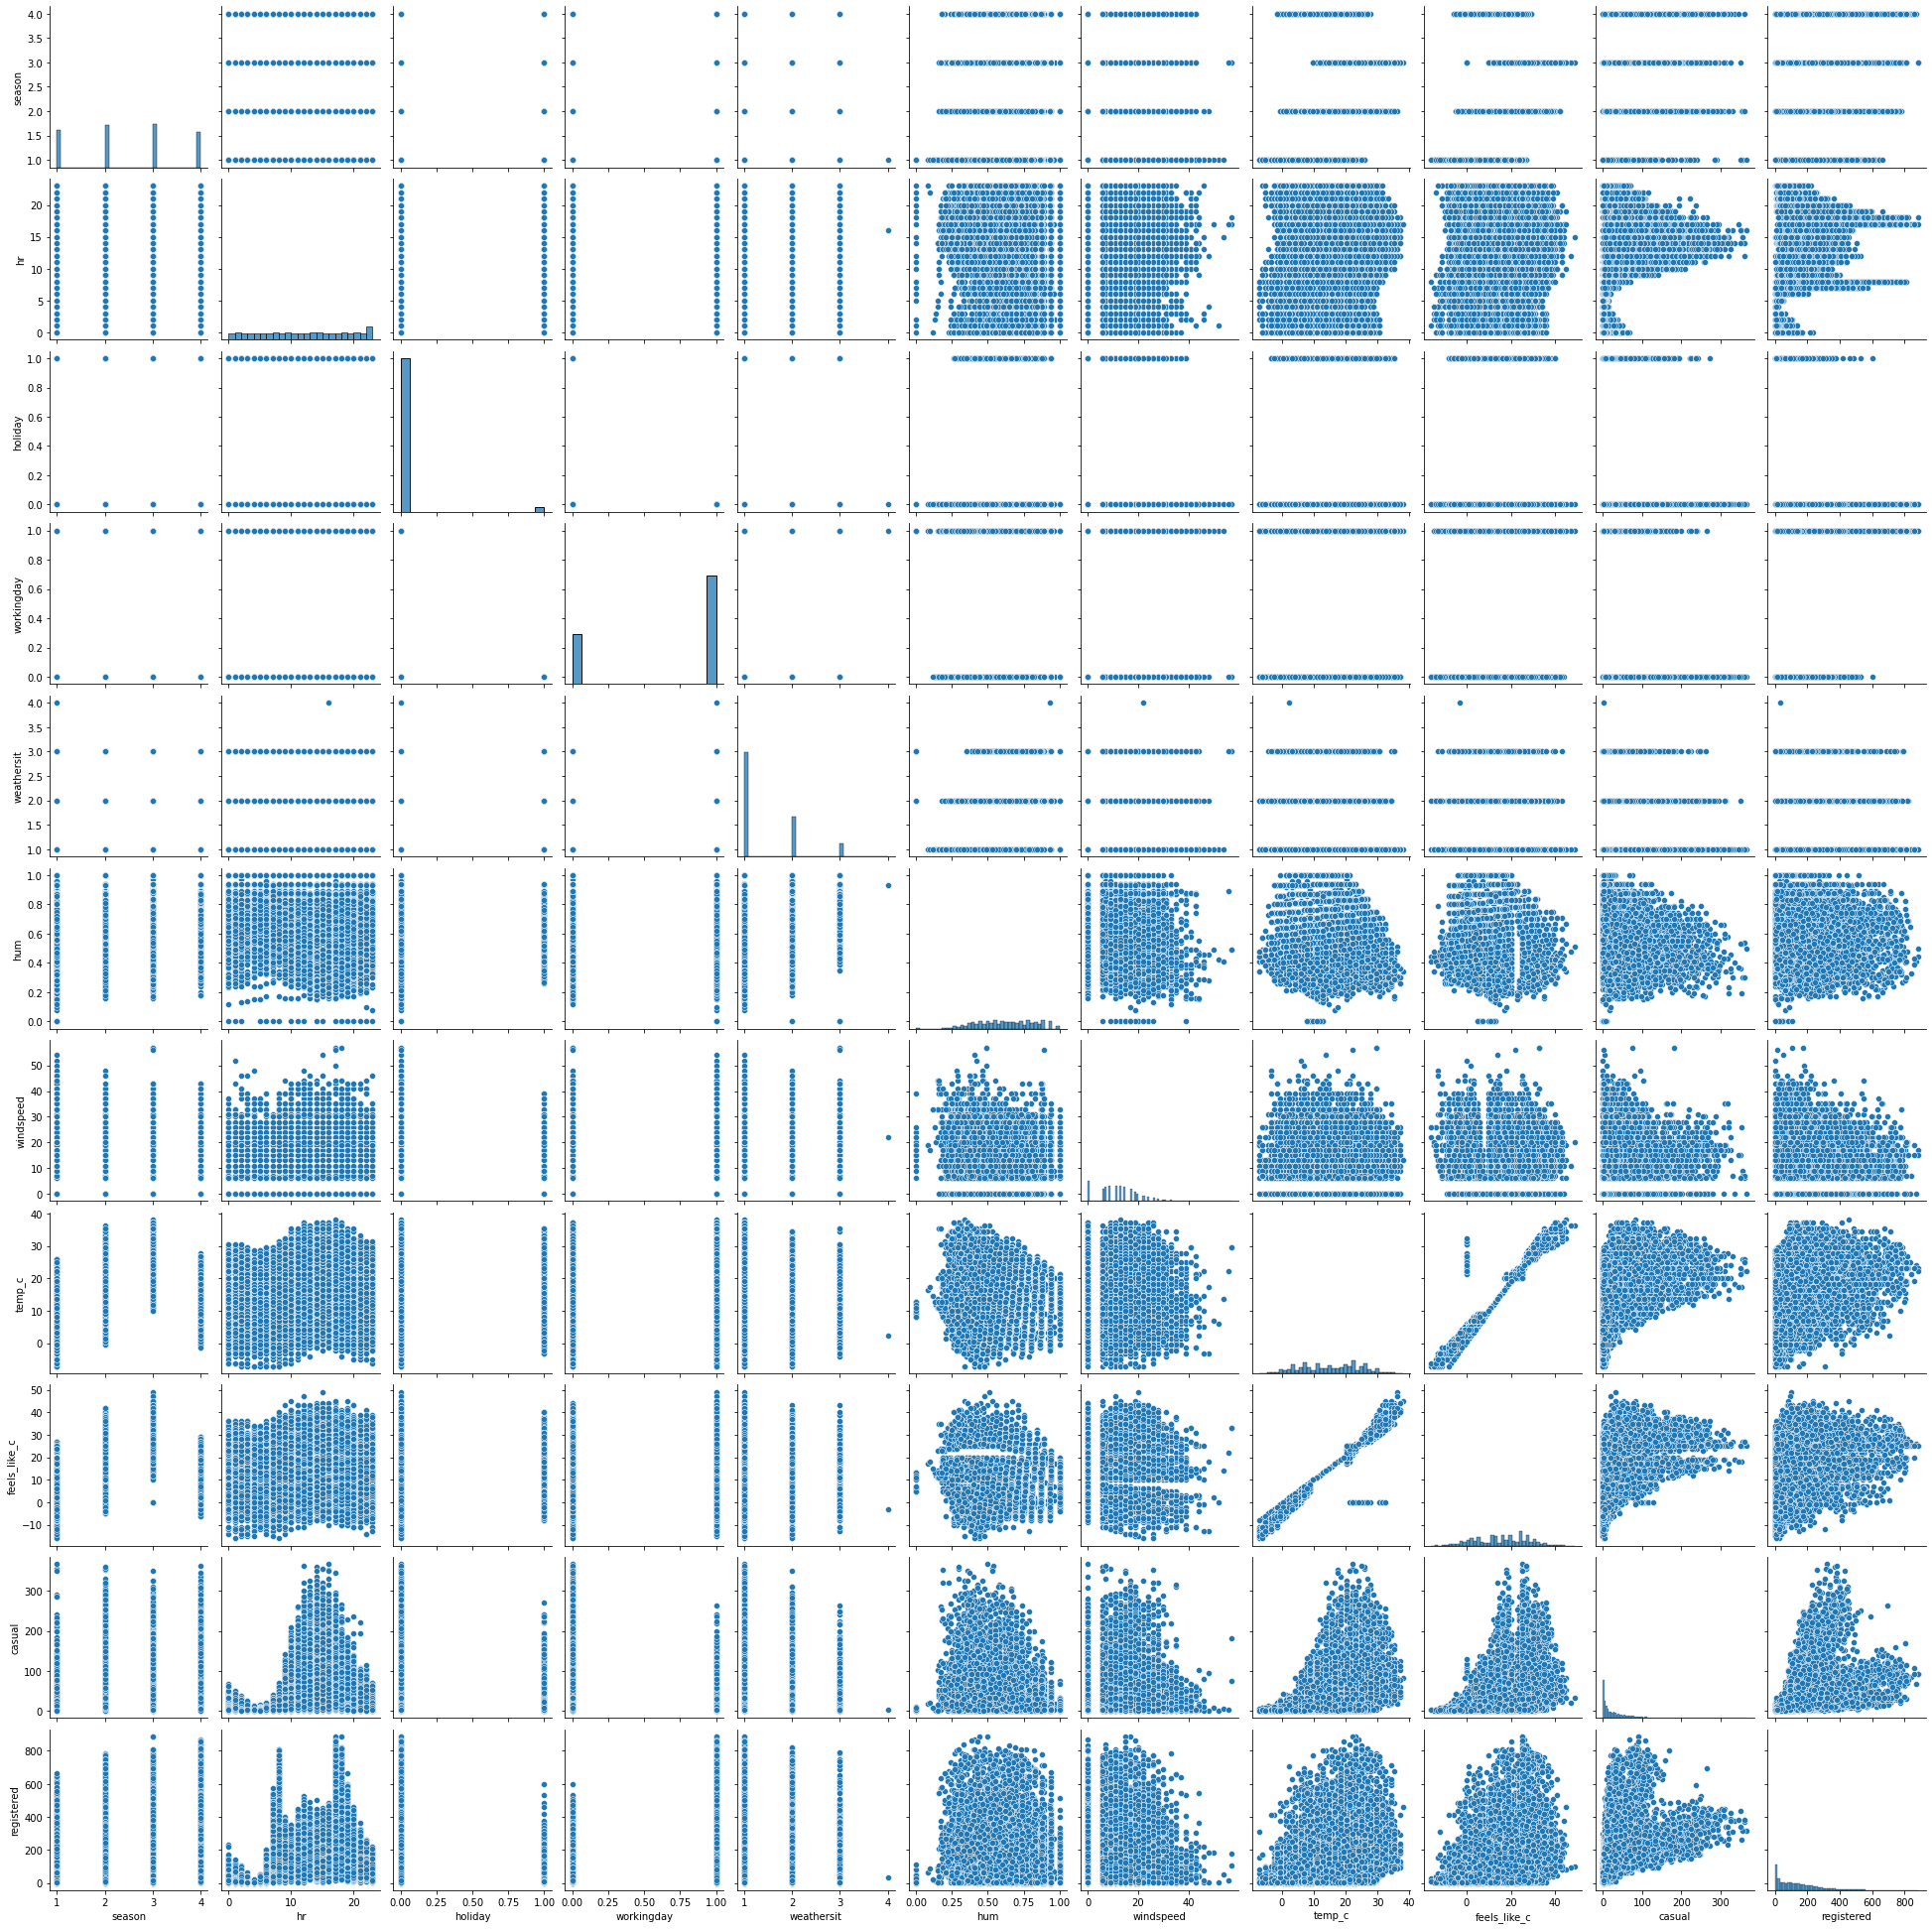

In [ ]:
sns.pairplot(dat)

In [ ]:
dat = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
dat['total'] = dat['casual']+dat['registered']
dat['dteday'] = pd.to_datetime(dat['dteday'])


#One hot hey
dat['weathersit'] = dat['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})
dat = pd.get_dummies(dat, columns=['weathersit'], prefix='', prefix_sep='')

dat['season'] = dat['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
dat = pd.get_dummies(dat, columns=['season'], prefix='', prefix_sep='')

dat = pd.get_dummies(data = dat, columns = ['hr'], drop_first=True)

certainDate = pd.to_datetime("2011-01-01")

dat["Since"] = dat['dteday'] - certainDate
dat["Since"] = dat["Since"].astype('timedelta64[D]')

train_dataset = dat.sample(frac=0.8, random_state=50)
test_dataset = dat.drop(train_dataset.index)

train_features = train_dataset.copy().drop(columns=['dteday', 'casual', 'registered'])
test_features = test_dataset.copy().drop(columns=['dteday', 'casual', 'registered'])

train_labels = train_features.pop('total')
test_labels=test_features.pop('total')

In [ ]:
df = dat.copy()
df['month']=pd.DatetimeIndex(df['dteday']).month


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

def build_and_compile_model(norm):
  model=keras.Sequential([
      norm,
      layers.Dense(450, input_dim = 39, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss='MeanSquaredError',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


bike_model = build_and_compile_model(normalizer)

history = bike_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=90
)
test_results = bike_model.evaluate(test_features, test_labels, verbose=0)
predict = bike_model.predict(test_features)


print('MSE: ', test_results)
print('R2', r2_score(y_pred=predict, y_true = test_labels))

104/104 [==============================] - 0s 2ms/step
MSE:  2378.864501953125
R2 0.9265372975837654


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([1000, 40000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

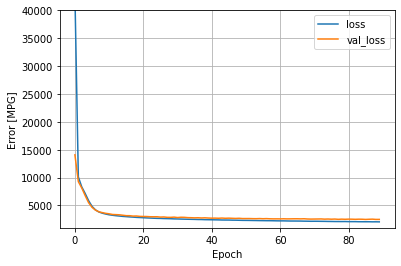

In [ ]:
plot_loss(history)

In [ ]:
test_results = bike_model.evaluate(test_features, test_labels, verbose=0)
predict = bike_model.predict(test_features)


print('MSE: ', test_results)
print('R2', r2_score(y_pred=predict, y_true = test_labels))

104/104 [==============================] - 0s 2ms/step
MSE:  2210.117431640625
R2 0.930584218280312


In [ ]:
bike_model.save('bike_model')

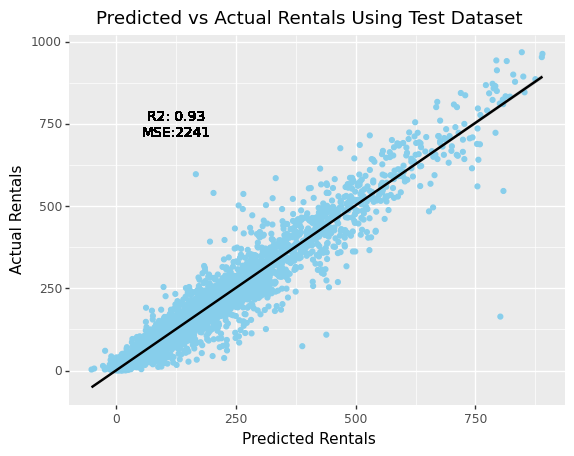

<ggplot: (8761951821649)>

In [ ]:
(ggplot(test_features, aes(x=predict, y=test_labels))+
 geom_point(color='skyblue')+
 geom_smooth(method='lm')+
 pn.labs(x='Predicted Rentals', y='Actual Rentals', title='Predicted vs Actual Rentals Using Test Dataset')+
 pn.geom_text(x=125, y=750, label='R2: 0.93\nMSE:2241', size=10))

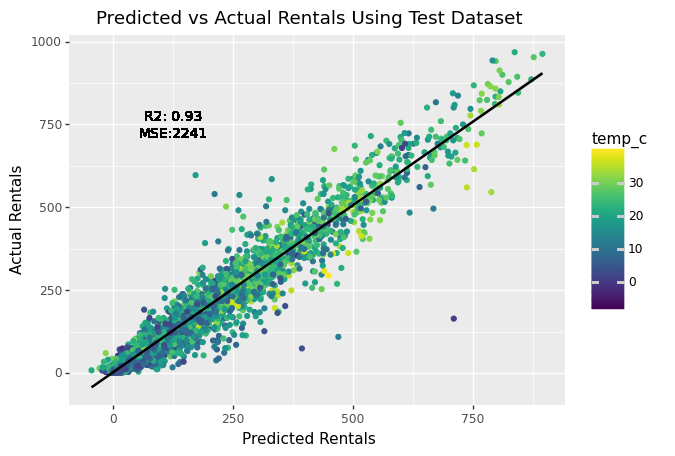

<ggplot: (8761950126973)>

In [ ]:
(ggplot(test_features, aes(x=predict, y=test_labels))+
 geom_point(aes(color='temp_c'))+
 geom_smooth(method='lm')+
 pn.labs(x='Predicted Rentals', y='Actual Rentals', title='Predicted vs Actual Rentals Using Test Dataset')+
 pn.geom_text(x=125, y=750, label='R2: 0.93\nMSE:2241', size=10))

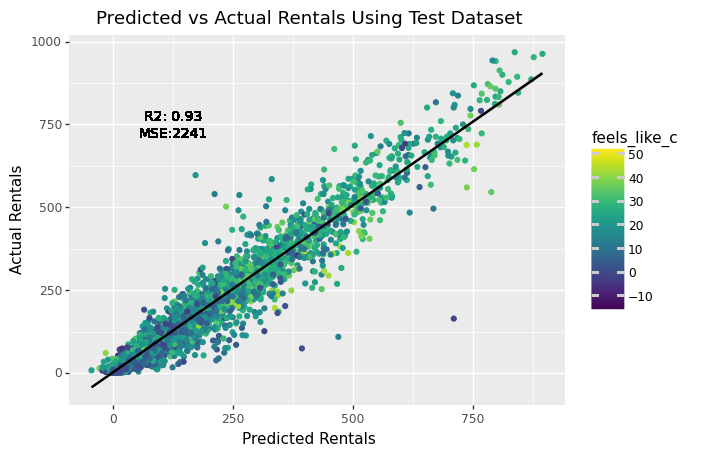

<ggplot: (8761954581949)>

In [ ]:
(ggplot(test_features, aes(x=predict, y=test_labels))+
 geom_point(aes(color='feels_like_c'))+
 geom_smooth(method='lm')+
 pn.labs(x='Predicted Rentals', y='Actual Rentals', title='Predicted vs Actual Rentals Using Test Dataset')+
 pn.geom_text(x=125, y=750, label='R2: 0.93\nMSE:2241', size=10))

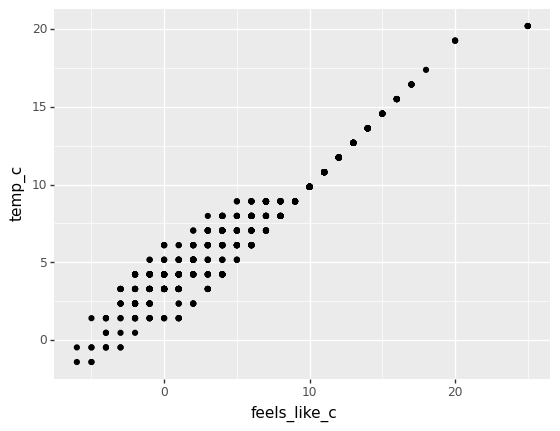

<ggplot: (8761952809049)>

In [ ]:
(ggplot(dat, aes(x='feels_like_c', y='temp_c'))+
 geom_point())

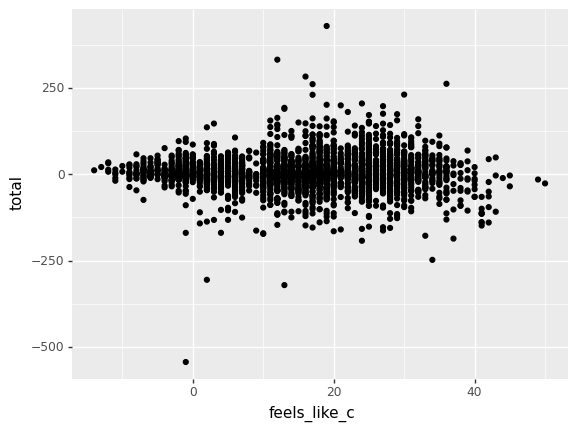

<ggplot: (8761951124833)>

In [ ]:
res = test_labels - predict.squeeze()
(ggplot(test_features, aes(x='feels_like_c', y=res))+
 geom_point())

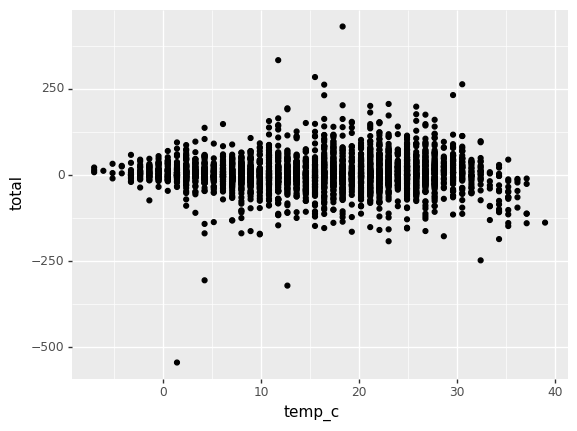

<ggplot: (8761950731881)>

In [ ]:
(ggplot(test_features, aes(x='temp_c', y=res))+
 geom_point())

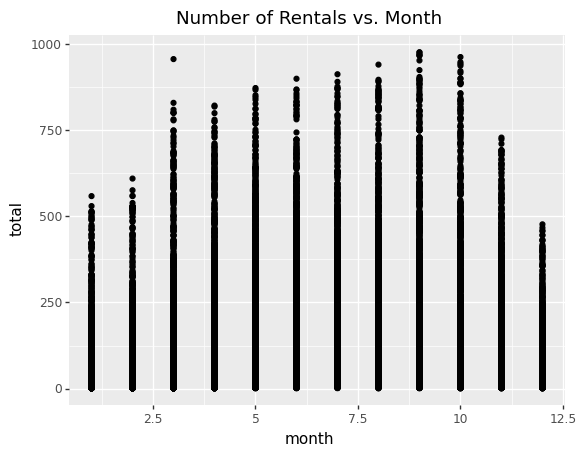

<ggplot: (8761950937173)>

In [ ]:
(ggplot(df, aes(x='month', y='total'))+
 geom_point()+
 pn.labs(title='Number of Rentals vs. Month'))

# Hypertuning

In [ ]:
def model_builder(hp):
  model=keras.Sequential()
  # model.add(keras.layers.Flatten(input_shape = (3, 3)))


  # Get activation function from a list
  units = hp.Int('units', min_value=100, max_value = 500, step = 100)
  functions = hp.Choice('activation', values=['relu', 'elu', 'tanh'])
  model.add(keras.layers.Dense(units=450, input_dim=38, activation=functions))
  model.add(keras.layers.Dense(1, activation=functions))

  #Get learning rate from a list
  bike_learning_rate = hp.Choice('learning_rate', values=[0.01, 1e-2, 1e-3])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=bike_learning_rate),
                loss='MeanSquaredError')
  return model

In [ ]:
tuner = kt.Hyperband(model_builder, 
                     max_epochs=300,
                     objective='val_loss',
                     factor=3,
                     directory='my_dir',

                     #To rerun with diff parameters, change project name
                     project_name='take_one')

In [ ]:
#Set a stop early function if the model doesn't improve after 10 sequential epochs
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


In [ ]:
# This works just like model.fit, it runs through each possible choice to find the best group of parameters
tuner.search(train_features, train_labels, epochs=100, validation_split=0.2, callbacks=[stop_early])


Trial 28 Complete [00h 00m 03s]
val_loss: 24071.7578125

Best val_loss So Far: 10311.0234375
Total elapsed time: 00h 01m 26s


In [ ]:
#This cell prints the optimal values

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')} and the optimal activation function is {best_hps.get('activation')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 300 and the optimal learning rate for the optimizer
is 0.01 and the optimal activation function is elu.



In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/take_five
Showing 10 best trials
Trial summary
Hyperparameters:
activation: elu
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 5
tuner/round: 0
Score: 11022.1005859375
Trial summary
Hyperparameters:
activation: tanh
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 5
tuner/round: 0
Score: 69846.5546875
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 5
tuner/round: 0
Score: 70226.5078125


In [ ]:
model= tuner.hypermodel.build(best_hps)

#After finding parameters, this function finds the optimal number of epochs
history=model.fit(train_features, train_labels, epochs=250, validation_split=0.2, callbacks=[stop_early])

val_acc_per_epoch = history.history['val_loss']
best_epoch= val_acc_per_epoch.index(min(val_acc_per_epoch))+1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/250
333/333 [==============================] - 1s 3ms/step - loss: 24083.2402 - val_loss: 18124.6875
Epoch 2/250
333/333 [==============================] - 1s 3ms/step - loss: 14317.6045 - val_loss: 10923.1484
Epoch 3/250
333/333 [==============================] - 1s 3ms/step - loss: 11376.2676 - val_loss: 10115.6855
Epoch 4/250
333/333 [==============================] - 1s 3ms/step - loss: 10931.3242 - val_loss: 9680.5459
Epoch 5/250
333/333 [==============================] - 1s 3ms/step - loss: 10494.2891 - val_loss: 9798.6787
Epoch 6/250
333/333 [==============================] - 1s 3ms/step - loss: 10436.0244 - val_loss: 9654.0439
Epoch 7/250
333/333 [==============================] - 1s 3ms/step - loss: 10531.8008 - val_loss: 9611.7148
Epoch 8/250
333/333 [==============================] - 1s 3ms/step - loss: 9638.6494 - val_loss: 9704.4678
Epoch 9/250
333/333 [==============================] - 1s 3ms/step - loss: 9621.2803 - val_loss: 12107.5215
Epoch 10/250
333/333 [====

# Try Tuned Hyperparameters on Data

In [ ]:
def build_and_compile_model(norm):
  model=keras.Sequential([
      norm,
      layers.Dense(200, input_dim = 39, activation='relu'),
      layers.Dense(200, activation='relu'),
      layers.Dense(200, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss='MeanSquaredError',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
  return model

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

bike_model = build_and_compile_model(normalizer)

history = bike_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=90
)

test_results = bike_model.evaluate(test_features, test_labels, verbose=0)
predict = bike_model.predict(test_features)


print('RMSE: ', math.sqrt(test_results))
print('R2', r2_score(y_pred=predict, y_true = test_labels))

104/104 [==============================] - 0s 2ms/step
RMSE:  49.92993626228908
R2 0.921699430995292


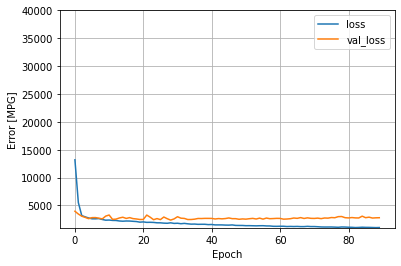

In [ ]:
plot_loss(history)

## Try other optimizers

### SGD

In [ ]:
def build_and_compile_model(norm):
  model=keras.Sequential([
      norm,
      layers.Dense(450, input_dim = 39, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss='MeanSquaredError',
                optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01))
  return model

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

bike_model = build_and_compile_model(normalizer)

history = bike_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=90
)

test_results = bike_model.evaluate(test_features, test_labels, verbose=0)
predict = bike_model.predict(test_features)


print('MSE: ', test_results)
print('R2', r2_score(y_pred=predict, y_true = test_labels))

104/104 [==============================] - 0s 1ms/step
RMSE:  2170.707275390625
R2 0.9318220295916161


In [ ]:
opt = [tf.keras.optimizers.Adam, tf.keras.optimizers.Adamax, tf.keras.optimizers.Adadelta, tf.keras.optimizers.Adagrad]
for o in opt:
  def build_and_compile_model(norm):
    model=keras.Sequential([
        norm,
        layers.Dense(450, input_dim = 39, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss='MeanSquaredError',
                  optimizer=o(learning_rate=0.01))
    return model

  normalizer = tf.keras.layers.Normalization(axis=-1)
  normalizer.adapt(np.array(train_features))

  bike_model = build_and_compile_model(normalizer)

  history = bike_model.fit(
      train_features,
      train_labels,
      validation_split=0.2,
      verbose=0, epochs=90
  )

  test_results = bike_model.evaluate(test_features, test_labels, verbose=0)
  predict = bike_model.predict(test_features)

  print('Optimizer: ', o)
  print('MSE: ', test_results)
  print('R2', r2_score(y_pred=predict, y_true = test_labels))

104/104 [==============================] - 0s 2ms/step
Optimizer:  <class 'keras.optimizers.optimizer_v2.adam.Adam'>
MSE:  2317.394775390625
R2 0.9272148269366762
104/104 [==============================] - 0s 2ms/step
Optimizer:  <class 'keras.optimizers.optimizer_v2.adamax.Adamax'>
MSE:  2184.96337890625
R2 0.9313742326171071
104/104 [==============================] - 0s 2ms/step
Optimizer:  <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>
MSE:  13863.4326171875
R2 0.56457456713599
104/104 [==============================] - 0s 2ms/step
Optimizer:  <class 'keras.optimizers.optimizer_v2.adagrad.Adagrad'>
MSE:  3244.246826171875
R2 0.898104087105435


# Use this one

In [ ]:
def build_and_compile_model(norm):
  model=keras.Sequential([
      norm,
      layers.Dense(450, input_dim = 39, activation='elu'),
      layers.Dense(1)
  ])
  model.compile(loss='MeanSquaredError',
                optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01))
  return model

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

bike_model = build_and_compile_model(normalizer)

history = bike_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=130
)

test_results = bike_model.evaluate(test_features, test_labels, verbose=0)
predict = bike_model.predict(test_features)


print('MSE: ', test_results)
print('R2', r2_score(y_pred=predict, y_true = test_labels))

104/104 [==============================] - 0s 2ms/step
MSE:  2225.203369140625
R2 0.9312825650081891


In [ ]:
bike_model.save('bike_model')

In [ ]:
test_labels.shape

(3327,)

### Batch size

In [ ]:
batch = [5,10,30,60]


for b in batch:
  def build_and_compile_model(norm):
    model=keras.Sequential([
        norm,
        layers.Dense(450, input_dim = 39, activation='elu'),
        layers.Dense(1)
    ])
    model.compile(loss='MeanSquaredError',
                  optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01))
    return model

  normalizer = tf.keras.layers.Normalization(axis=-1)
  normalizer.adapt(np.array(train_features))

  bike_model = build_and_compile_model(normalizer)

  history = bike_model.fit(
      train_features,
      train_labels,
      validation_split=0.2,
      verbose=0, epochs=130, batch_size = b
  )

  test_results = bike_model.evaluate(test_features, test_labels, verbose=0)
  predict = bike_model.predict(test_features)


  print('MSE: ', test_results)
  print('R2', r2_score(y_pred=predict, y_true = test_labels))

104/104 [==============================] - 0s 2ms/step
MSE:  2180.44580078125
R2 0.9315161230291156
104/104 [==============================] - 0s 2ms/step
MSE:  2168.635498046875
R2 0.93188708251465
104/104 [==============================] - 0s 2ms/step
MSE:  1989.3060302734375
R2 0.9375194869582167
104/104 [==============================] - 0s 2ms/step
MSE:  2031.53955078125
R2 0.9361930125619592


## Temp stuff

In [ ]:
train_drop_feels = train_dataset.copy().drop(columns=['dteday', 'casual', 'registered', 'feels_like_c'])
test_drop_feels = test_dataset.copy().drop(columns=['dteday', 'casual', 'registered', 'feels_like_c'])

train_df_labels = train_drop_feels.pop('total')
test_df_labels = test_drop_feels.pop('total')

In [ ]:
def build_and_compile_model(norm):
  model=keras.Sequential([
      norm,
      layers.Dense(450, input_dim = 39, activation='elu'),
      layers.Dense(1)
  ])
  model.compile(loss='MeanSquaredError',
                optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01))
  return model

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_drop_feels))

bike_model = build_and_compile_model(normalizer)

history = bike_model.fit(
    train_drop_feels,
    train_df_labels,
    validation_split=0.2,
    verbose=0, epochs=130
)

test_results = bike_model.evaluate(test_drop_feels, test_df_labels, verbose=0)
predict = bike_model.predict(test_drop_feels)


print('MSE: ', test_results)
print('R2', r2_score(y_pred=predict, y_true = test_df_labels))

104/104 [==============================] - 0s 2ms/step
MSE:  2080.1328125
R2 0.9346667860879828


# Mini holdout

In [ ]:
dat = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')

dat['dteday'] = pd.to_datetime(dat['dteday'])


dat['weathersit'] = dat['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})
dat = pd.get_dummies(dat, columns=['weathersit'], prefix='', prefix_sep='')

dat['season'] = dat['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
dat = pd.get_dummies(dat, columns=['season'], prefix='', prefix_sep='')

dat = pd.get_dummies(data = dat, columns = ['hr'], drop_first=True)

certainDate = pd.to_datetime("2011-01-01")

dat["Since"] = dat['dteday'] - certainDate
dat["Since"] = dat["Since"].astype('timedelta64[D]')

mini_holdout = dat.copy().drop(columns=['dteday'])
missing_columns = list(set(train_features.columns).difference(mini_holdout.columns))
mini_holdout[[missing_columns]] = 0
mini_holdout = mini_holdout[train_features.columns]

In [ ]:
reconstructed = keras.models.load_model('bike_model')

predictions = reconstructed.predict(mini_holdout)
predictions = pd.DataFrame(predictions)
predictions.columns = ['price']
predictions.to_csv('team6-module4-predictions.csv', index=False)

2/2 [==============================] - 0s 8ms/step


# Holdout

In [ ]:
dat = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')

dat['dteday'] = pd.to_datetime(dat['dteday'])


#One hot hey
dat['weathersit'] = dat['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})
dat = pd.get_dummies(dat, columns=['weathersit'], prefix='', prefix_sep='')

dat['season'] = dat['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
dat = pd.get_dummies(dat, columns=['season'], prefix='', prefix_sep='')

dat = pd.get_dummies(data = dat, columns = ['hr'], drop_first=True)

certainDate = pd.to_datetime("2011-01-01")

dat["Since"] = dat['dteday'] - certainDate
dat["Since"] = dat["Since"].astype('timedelta64[D]')


mini_holdout = dat.copy().drop(columns=['dteday'])
missing_columns = list(set(train_features.columns).difference(mini_holdout.columns))
mini_holdout[[missing_columns]] = 0
mini_holdout = mini_holdout[train_features.columns]

reconstructed = keras.models.load_model('bike_model')

predictions = reconstructed.predict(mini_holdout)
predictions = pd.DataFrame(predictions)
predictions.columns = ['price']
predictions['price'] = predictions['price'].apply(lambda x: 0 if x<0 else x)
predictions.to_csv('team6-module4-predictions.csv', index=False)



24/24 [==============================] - 0s 2ms/step
